# SQuAD Exploratory Data Analysis

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline

data_dir = "./data/"

train_context_path = os.path.join(data_dir, "train.context")
train_qn_path = os.path.join(data_dir, "train.question")
train_ans_path = os.path.join(data_dir, "train.span")
dev_context_path = os.path.join(data_dir, "dev.context")
dev_qn_path = os.path.join(data_dir, "dev.question")
dev_ans_path = os.path.join(data_dir, "dev.span")

## Import Data

In [103]:
train_context = pd.read_csv(train_context_path, sep="\n", header=None, error_bad_lines=False)
train_qn = pd.read_csv(train_qn_path, sep="\n", header=None, error_bad_lines=False)
train_ans = pd.read_csv(train_ans_path, sep="\n", header=None, error_bad_lines=False)

train = pd.DataFrame({
    "context": train_context[0],
    "qn": train_qn[0],
    "ans": train_ans[0]
})

train = train.dropna()

b'Skipping line 12994: expected 1 fields, saw 2\nSkipping line 15424: expected 1 fields, saw 2\nSkipping line 26510: expected 1 fields, saw 2\nSkipping line 37850: expected 1 fields, saw 2\nSkipping line 53010: expected 1 fields, saw 2\nSkipping line 54838: expected 1 fields, saw 2\nSkipping line 55332: expected 1 fields, saw 2\nSkipping line 63999: expected 1 fields, saw 2\nSkipping line 73597: expected 1 fields, saw 2\nSkipping line 74265: expected 1 fields, saw 2\nSkipping line 76603: expected 1 fields, saw 2\nSkipping line 77090: expected 1 fields, saw 2\nSkipping line 78049: expected 1 fields, saw 2\nSkipping line 80468: expected 1 fields, saw 2\nSkipping line 82129: expected 1 fields, saw 2\nSkipping line 83326: expected 1 fields, saw 2\n'


In [100]:
dev_context = pd.read_csv(dev_context_path, sep="\n", header=None, error_bad_lines=False)
dev_qn = pd.read_csv(dev_qn_path, sep="\n", header=None, error_bad_lines=False)
dev_ans = pd.read_csv(dev_ans_path, sep="\n", header=None, error_bad_lines=False)

dev = pd.DataFrame({
    "context": dev_context[0],
    "qn": dev_qn[0],
    "ans": dev_ans[0]
})

In [111]:
data = pd.concat([train, dev])

## Understanding the Data

In [81]:
idx = random.randint(0, len(train))

train.loc[idx, 'context']

"83 % of the total population adheres to christianity , making it the most common religion in swaziland . anglican , protestant and indigenous african churches , including african zionist , constitute the majority of the christians ( 40 % ) , followed by roman catholicism at 20 % of the population . on 18 july 2012 , ellinah wamukoya , was elected anglican bishop of swaziland , becoming the first woman to be a bishop in africa . 15 % of the population follows traditional religions ; other non-christian religions practised in the country include islam ( 1 % ) , the bahá'í faith ( 0.5 % ) , and hinduism ( 0.2 % ) . there are 14 jewish families ."

In [82]:
train.loc[idx, 'qn']

'what percentage of the swazi population are christian ?'

### First Answer

In [89]:
" ".join(train.loc[idx, 'context'].split()[int(train.loc[idx, 'ans'].split()[0]):int(train.loc[idx, 'ans'].split()[1]) + 1])

'83 %'

## Context Histogram

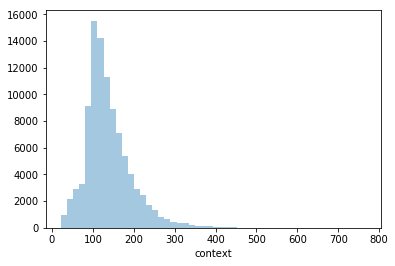

In [118]:
def get_len(string):
    return len(string.split())

sns.distplot(data['context'].apply(get_len), kde=False)

## Question Histogram

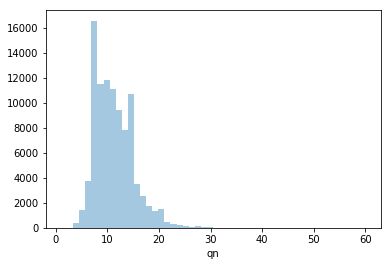

In [116]:
sns.distplot(data['qn'].apply(get_len), kde=False)

## Answer Histogram

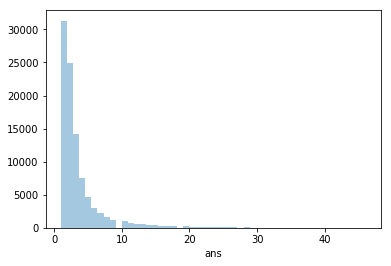

In [121]:
def get_ans_len(string):
    return int(string.split()[1]) + 1 - int(string.split()[0])

sns.distplot(data['ans'].apply(get_ans_len), kde=False)

Critically, we should be more interested in **WHERE** the answer occured in the context

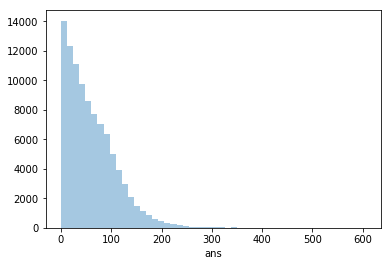

In [122]:
def get_ans_ind(string):
    return int(string.split()[1])

sns.distplot(data['ans'].apply(get_ans_ind), kde=False)